In [76]:
#import the required lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
#read the requried dataset i.e.,train.csv file
data=pd.read_csv('train.csv')

In [78]:
#see the head of the dataset
data.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [79]:
#see the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


In [5]:
#by observing the info we get to know that x has 700 values where as y has 699 so we get to know that y has one missing value

In [80]:
#missing value of y
data['y'].isnull().value_counts()

False    699
True       1
Name: y, dtype: int64

In [53]:
#here we can either drop that coressponding row or we can fill it with some value inorder 
#to get to a conclusion we have to analyse the data

In [57]:
#by filling the missing value with mean of the y
data['y'].fillna(data['y'].mean(),inplace=True)

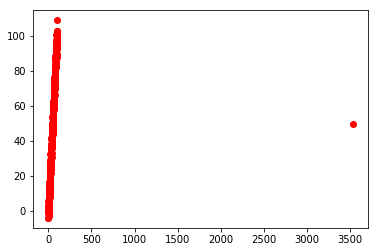

In [58]:
#ploting the graph with filling missing value with mean
plt.scatter(data['x'],data['y'],c='red')

In [16]:
#the above graph has an outlier at 3500 that can effect while predicting the data 
#as the regression line consider the value of 3500 and the prediction may go wrong so we can neglect the value bu droping it

In [81]:
#dropping the missing value
data.dropna(inplace=True)

In [82]:
#now we can procced to our next stage i.e., training the data

In [83]:
X=data['x'].reshape(-1,1)
y=data['y']

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [84]:
#training and spliting the data
from sklearn.cross_validation import train_test_split

In [85]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [86]:
#importing the linear regression class from sklearn
from sklearn.linear_model import LinearRegression

In [87]:
#creating the object for Linearregression method
lm=LinearRegression()

In [88]:
#fiting the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
#next stage is to predicting 

In [89]:
pred=lm.predict(X_test)

In [72]:
#score of the prediction here our score is about 99% which is preety good

In [101]:
lm.score(X_test,y_test)

0.99184823910521958

In [ ]:
#visualizing the predictions with linear regression line

Text(0.5,1,'Linear Regression Graph')

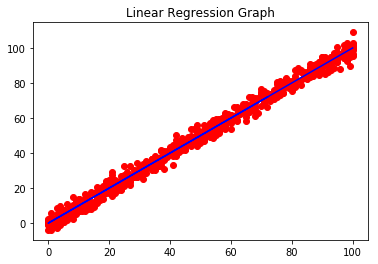

In [95]:
plt.scatter(X,y,c='red')
plt.plot(X_train,lm.predict(X_train),c='blue')
plt.title('Linear Regression Graph')

Text(0.5,1,'Y_test vs predictions')

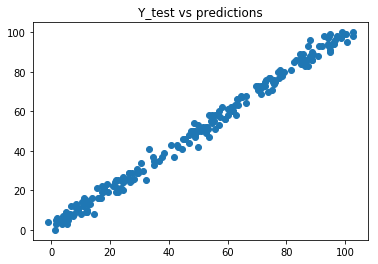

In [103]:
plt.scatter(y_test,pred)
plt.title('Y_test vs predictions')

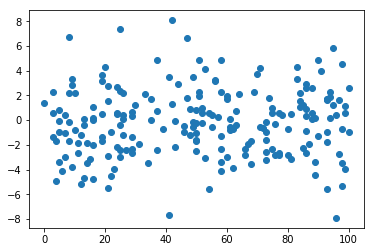

In [105]:
plt.scatter(pred,y_test-pred)

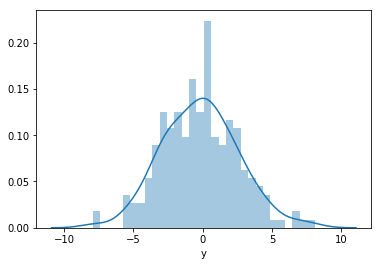

In [100]:
sns.distplot(y_test-pred,bins=30)